This notebook loads pandas dataframes pickled in a previous notebook and describes the construction of the timeseries plots.

In [1]:
import pandas as pd
import matplotlib.pyplot as pl
from datetime import datetime
import pickle
from matplotlib import rcParams
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from IPython.core.display import HTML, display

In [2]:
%matplotlib inline

In [3]:
# Global graphics setup
display(HTML("<style>.container {width: 90%}</style>"))
plot_colors = {'swf': '#000000',
               'aqua': '#348ABD',
               'viirs': '#A60628',
               'mei': '#467821',
               }
rcParams['axes.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['font.size'] = 15
rcParams['ytick.major.size'] = 8
rcParams['ytick.minor.size'] = 3
rcParams['xtick.major.size'] = 8
rcParams['xtick.minor.size'] = 3
rcParams['xtick.top'] = True
rcParams['ytick.direction'] = 'in'
rcParams['xtick.direction'] = 'in'

In [4]:
# Load the previously pickled dataframes 
with open('../PklJar/dict_df_chl.pkl', 'rb') as f:
    datadict = pickle.load(f)
    df_aqua = datadict['aqua']
    df_swf = datadict['swf']
    df_swf_aqua = datadict['swf_aqua']

In [5]:
df_mei = pd.read_pickle('../PklJar/dfMEI.pkl')
df_mei = df_mei['1997-11':]
df_mei['inv_scaled'] = (df_mei.MEI*-1)/150

In [6]:
def chl_to_perc(chl, mean):
    return (chl - mean) / mean * 100


def chl_anom_to_perc(chl, mean):
    return chl / mean * 100
    

def set_time_axis(ax):
    x_minorlocator = mdates.YearLocator()
    x_majorformatter = mdates.DateFormatter('%b\n%Y')
    ax.xaxis.set_minor_locator(x_minorlocator)
    ax.xaxis.set_tick_params(rotation=0)
    ax.xaxis.set_major_formatter(x_majorformatter)
    ax.set_xlabel('')


def make_ax_1(ax_c, ylims=None, ls='-', use_viirs=True, mean_chl=0.1404):
    y_majorlocator = mtick.MultipleLocator(0.02)
    y_minorlocator = mtick.MultipleLocator(0.0025)
    lbl = 'chl_a_mean'
    df_swf.plot(y=lbl, marker='+', linestyle=ls, ax=ax_c, color=plot_colors['swf'])
    df_aqua.plot(y=lbl, marker='+', linestyle=ls, ax=ax_c, color=plot_colors['aqua'])
    if use_viirs:
        df_viirs.plot(y=lbl, marker='+', linestyle=ls, ax=ax_c, color=plot_colors['viirs'])
    ax_c.set_ylabel('Chla $(mg\ m^{-3})$')
    ax_c.yaxis.set_major_locator(y_majorlocator)
    ax_c.yaxis.set_minor_locator(y_minorlocator)  
    if ylims:
        ax_c.set_ylim(ylims)
    else:
        ylims = ax_c.get_ylim()
    if use_viirs:
        ax_c.legend(['SeaWiFS', 'Aqua', 'VIIRS'], loc='lower center', ncol=3);  
    else:
        ax_c.legend(['SeaWiFS', 'MODISA'], loc='lower center', ncol=2);
    ax_c.axhline(mean_chl, color='k')
    ax_p = ax_c.twinx()
    ax_p.set_ylabel('Chla (%)')
    ax_p.set_ylim(chl_to_perc(ylims[0], mean=mean_chl),
                  chl_to_perc(ylims[1], mean=mean_chl)
                 )
    ax_c.grid(axis='x', linestyle='--', linewidth=2)
    set_time_axis(ax_c)

    
def make_ax_2(ax, ls='-', use_viirs=True, ylims=None, mean_chl=0.1404):
    #ax2 = ax.twinx()
    lbl = 'chl_anomaly'
    df_swf.plot(y=lbl, marker='+', linestyle=ls, 
                color=plot_colors['swf'], ax=ax, legend=False)
    df_aqua.plot(y=lbl, marker='+', linestyle=ls,
                 ax=ax, color=plot_colors['aqua'], legend=False)
    if use_viirs:
        df_viirs.plot(y=lbl, marker='+', linestyle=ls,
                      ax=ax, color=plot_colors['viirs'], legend=False)
    df_mei.plot(y='inv_scaled', marker='D', ax=ax,
                color=plot_colors['mei'], linestyle='', legend=False)
    ax.axhline(linestyle='-', linewidth=1.5, color='k')
    ax.grid(axis='x', linestyle='--', linewidth=2)
    ax.set_ylabel('Chla Anomaly ($mg\ m^{-3}$)') 
    if ylims:
        ax.set_ylim(ylims)
    else:
        ylims = ax.get_ylim()
    ax2 = ax.twinx()
    ax2.set_ylabel('Chla Anomaly (%)')
    ax2.set_ylim(chl_anom_to_perc(ylims[0], mean=mean_chl),
                 chl_anom_to_perc(ylims[1], mean=mean_chl))
    set_time_axis(ax)
    ax.set_xlabel('')

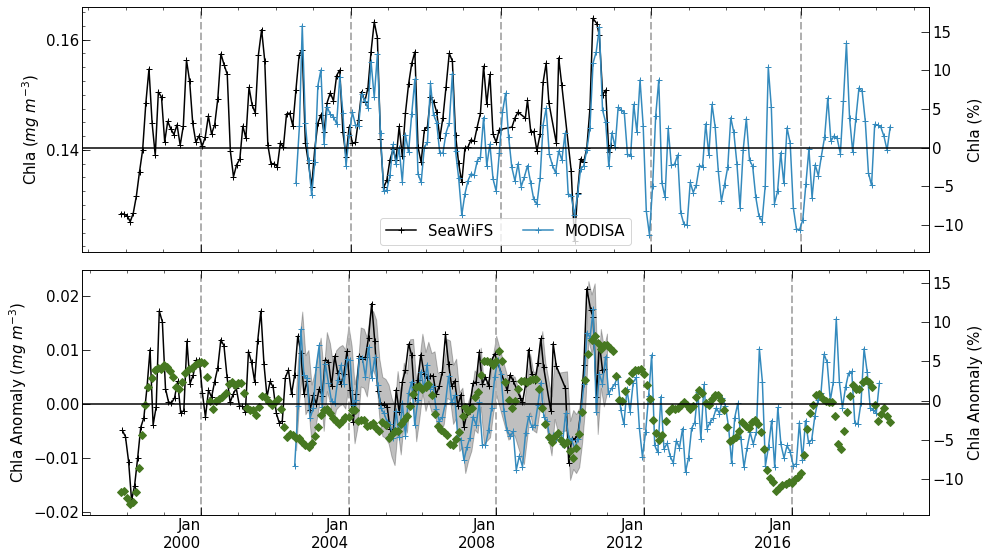

In [7]:
f, axs = pl.subplots(nrows=2, figsize=(14, 8))
make_ax_1(axs[0], use_viirs=False);
make_ax_2(axs[1], use_viirs=False)
axs[1].fill_between(df_swf_aqua.index.values, y1=df_swf_aqua.diff_neg, y2=df_swf_aqua.diff_pos,
                color='k', alpha=0.25)
f.tight_layout()
#axs[0].legend(['SeaWiFS', 'Aqua'], loc='lower center', ncol=2); 

In [9]:
f.savefig('../FigJar/timeseries2018_4x7.pdf')